# Блокнот для демострации красоты фрактала

## Определение

**Фрактал** — множество, обладающее свойством самоподобия (объект, в точности или приближённо совпадающий с частью себя самого, то есть целое имеет ту же форму, что и одна или более частей).

Обычно так называют геометрическую фигуру, которая удовлетворяет одному или нескольким из следующих свойств:

* обладает сложной структурой при любом увеличении;
* является (приближенно) самоподобной;
* может быть построена рекурсивными процедурами.

## Немного истории

Само слово «фрактал» появилось благодаря гениальному ученому Бенуа Мандельброту (Benoît B. Mandelbrot).

![Mandelbrot](https://3dnews.ru/assets/external/illustrations/2013/08/27/754657/3.jpg)

Он сам придумал этот термин в семидесятых годах прошлого века, позаимствовав слово *fractus* из латыни, где оно буквально означает «ломанный» или «дробленный». Что же это такое? Сегодня под словом «фрактал» чаще всего принято подразумевать графическое изображение структуры, которая в более крупном масштабе подобна сама себе.
Математическая база для появления теории фракталов была заложена за много лет до рождения Бенуа Мандельброта, однако развиться она смогла лишь с появлением вычислительных устройств. Дело в том, что построить такое изображение с высокой степенью детализации вручную ранее было просто невозможно, на это требовалось огромное количество вычислений. 

## Применения фракталов в жизни

Примеры различных фрактальных структур можно встретить во многих явлениях природы. Фрактальные образы с успехом используются при описании хаотического поведения нелинейных динамических и диссипативных систем,  неоднородного распределения материи во Вселенной, при исследовании трещин и дислокационных скоплений в твердых телах, при изучении электрического пробоя, диффузии и агрегации частиц, роста кристаллов и т. д.

## Классификация фракталов

Для чтобы представить все многообразие фракталов удобно прибегнуть к их общепринятой классификации.

* Геометрические фракталы

* Алгебраические фракталы

### Геометрические фракталы

Фракталы этого класса самые наглядные. В двухмерном случае их получают с помощью некоторой ломаной (или поверхности в трехмерном случае), называемой генератором. За один шаг алгоритма каждый из отрезков, составляющих ломаную, заменяется на ломаную-генератор, в соответствующем масштабе. В результате бесконечного повторения этой процедуры, получается геометрический фрактал.

Рассмотрим один из таких фрактальных объектов - триадную кривую Коха. Построение кривой начинается с отрезка единичной длины - это 0-е поколение кривой Коха. Далее каждое звено (в нулевом поколении один отрезок) заменяется на образующий элемент через n=1. В результате такой замены получается следующее поколение кривой Коха. В 1-ом поколении - это кривая из четырех прямолинейных звеньев, каждое длиной по 1/3. Для получения 2-го поколения проделываются те же действия - каждое звено заменяется на уменьшенный образующий элемент. Итак, для получения каждого последующего поколения, все звенья предыдущего поколения необходимо заменить уменьшенным образующим элементом. 

![Koch](http://levinaleks.narod.ru/fraimage/image001.gif)

В машинной графике использование геометрических фракталов необходимо при получении изображений деревьев, кустов, береговой линии. Двухмерные геометрические фракталы используются для создания объемных текстур (рисунка на поверхности обьекта).

### Алгебраические фракталы

Это самая крупная группа фракталов. Получают их с помощью нелинейных процессов в n-мерных пространствах. 
Неожиданностью для математиков стала возможность с помощью примитивных алгоритмов порождать очень сложные нетривиальные структуры.

### Фрактал Мандельброта
В качестве примера рассмотрим множество Мандельброта. Алгоритм его построения достаточно прост и основан на простом итеративном выражении:

$Z[i+1] = Z[i] * Z[i] + C$

где Zi и C - комплексные переменные. 
Попробуем запрограммировать генерацию такого фрактала.

Импортируем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#игнорируем предупреждения numpy
np.warnings.filterwarnings('ignore')

Проинициализируем параметры для отображения фрактала

In [2]:
pmin, pmax, qmin, qmax = -2.5, 1.5, -2, 2
# пусть c = p + iq и p меняется в диапазоне от pmin до pmax,
# а q меняется в диапазоне от qmin до qmax

ppoints, qpoints = 200, 200
# число точек по горизонтали и вертикали

max_iterations = 300
# максимальное количество итераций

infinity_border = 10
# если ушли на это расстояние, считаем, что ушли на бесконечность

Опишем функцию, определяющую множество Мандельброта

In [3]:
def mandelbrot(pmin, pmax, ppoints, qmin, qmax, qpoints,
               max_iterations=200, infinity_border=10):
    # создаём двумерный массив для хранения значений точек изображения
    image = np.zeros((ppoints, qpoints))
    p, q = np.mgrid[pmin:pmax:(ppoints*1j), qmin:qmax:(qpoints*1j)]
    c = p + 1j*q
    z = np.zeros_like(c)
    for k in range(max_iterations):
        z = z**2 + c
        mask = (np.abs(z) > infinity_border) & (image == 0)
        image[mask] = k
        z[mask] = np.nan
    return -image.T

Нарисуем фрактал:

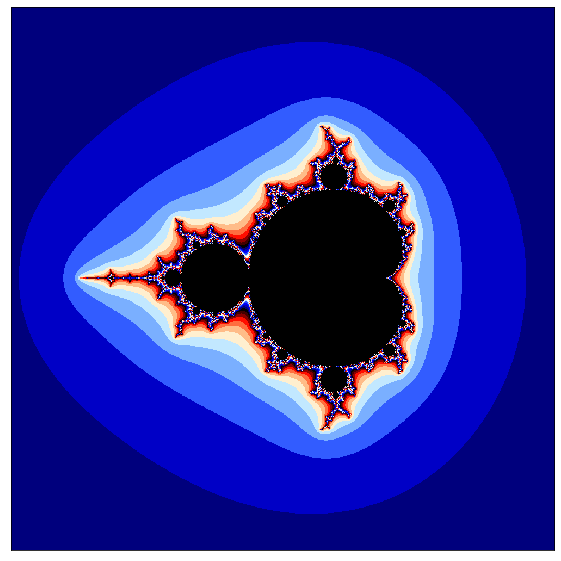

In [4]:
image = mandelbrot(pmin, pmax, 1000, qmin, qmax, 1000)

plt.figure(figsize=(10, 10))
# график без подписей на осях x и y
plt.xticks([])
plt.yticks([])
# преобразуем в растровое изображение
plt.imshow(image, cmap='flag', interpolation='none')
# отображаем его
plt.show()

Рассмотрим поподробнее множество Мандельброта в окрестности точки -0.793191078177363, 0.16093721735804 (центр фрактала). Будем постепенно приближаться к центру и смотреть, как выглядит фрактал Мандельброта.

In [5]:
p_center, q_center = -0.793191078177363, 0.16093721735804

def zoom_in(i): 
    scalefactor = i / 12000
    
    plt.figure(figsize=(10, 10))
    plt.xticks([])
    plt.yticks([])

    pmin_ = (pmin - p_center) * scalefactor + p_center
    qmin_ = (qmin - q_center) * scalefactor + q_center
    pmax_ = (pmax - p_center) * scalefactor + p_center
    qmax_ = (qmax - q_center) * scalefactor + q_center
    image = mandelbrot(pmin_, pmax_, 500, qmin_, qmax_, 500)

    plt.imshow(image, cmap='flag', interpolation='none')
    plt.show()


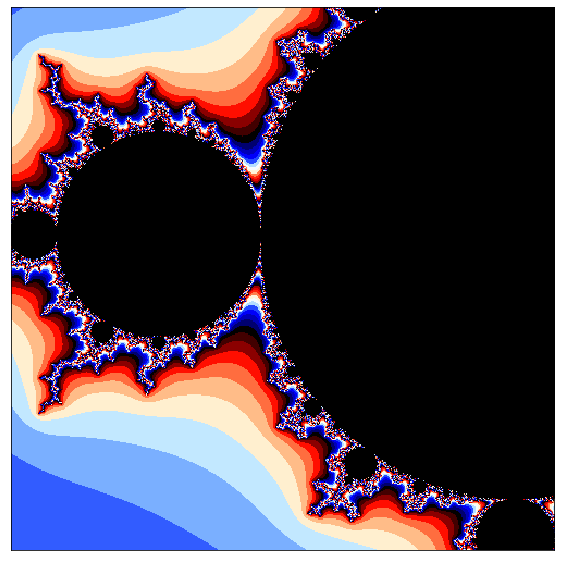

In [6]:
zoom_in(4000)

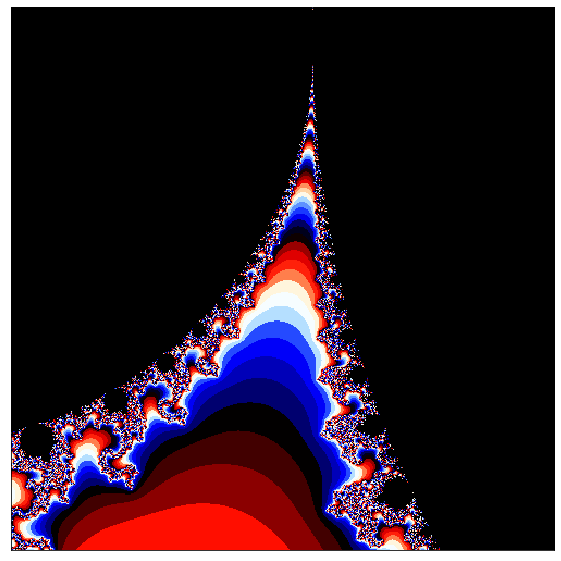

In [7]:
zoom_in(1000)

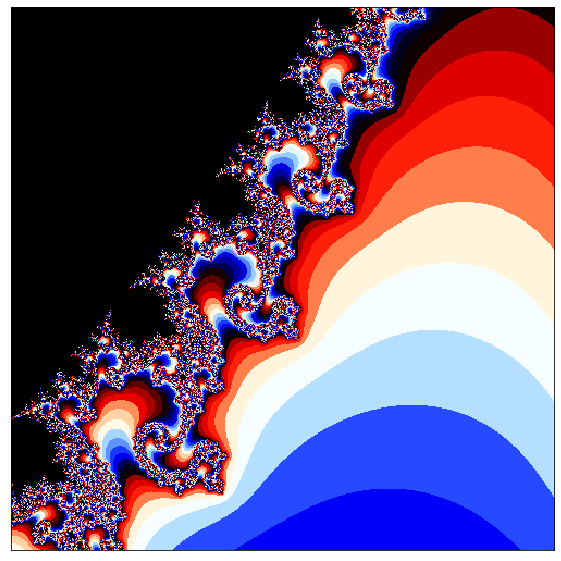

In [8]:
zoom_in(200)

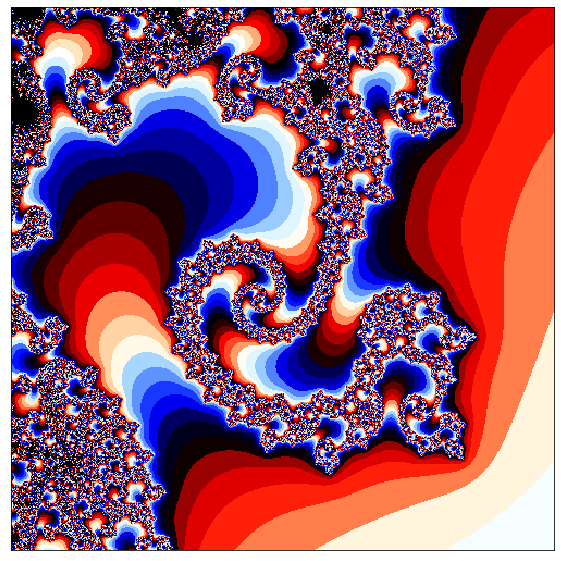

In [9]:
zoom_in(50)

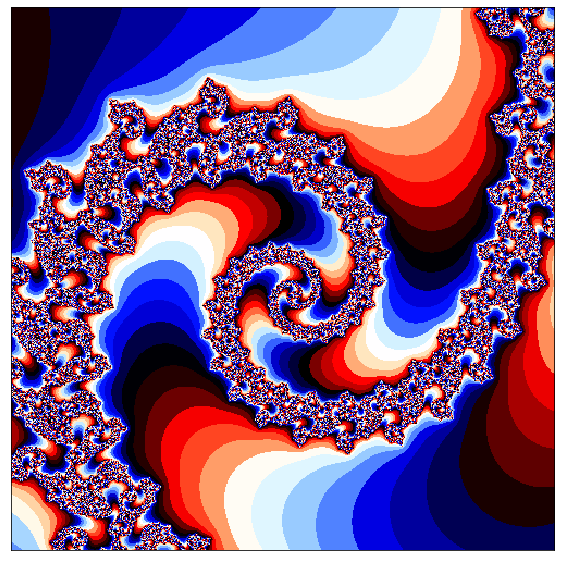

In [10]:
zoom_in(15)

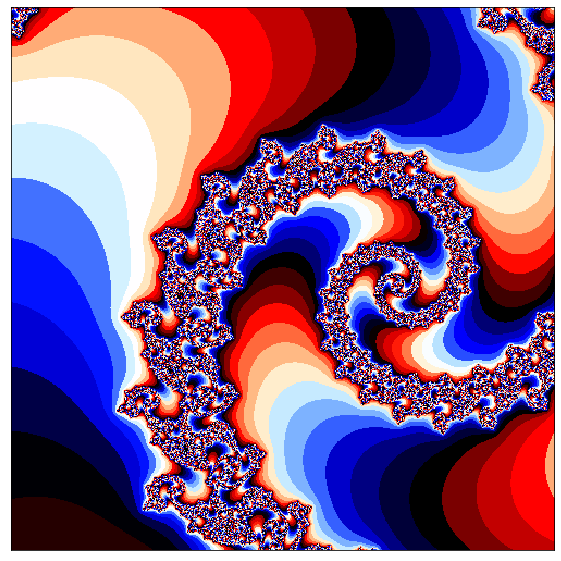

In [11]:
zoom_in(5)

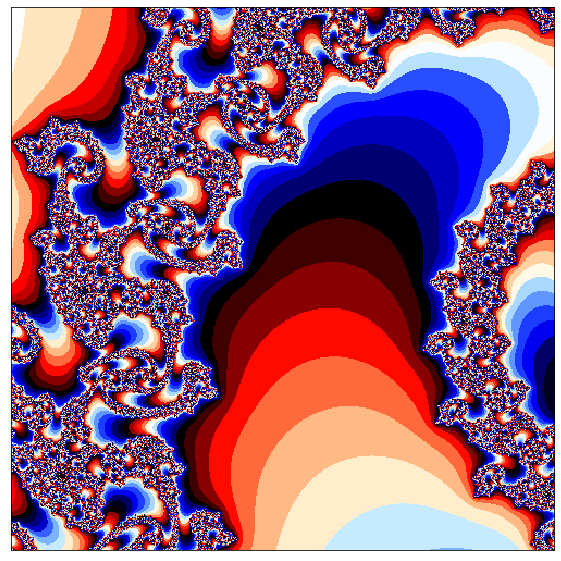

In [12]:
zoom_in(2)